<a href="https://colab.research.google.com/github/Ehtisham1053/Natural-Language-Processing/blob/main/CBOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is CBOW?

The Continuous Bag of Words (CBOW) model is one of the two architectures used in Word2Vec (the other being Skip-gram). It predicts a target word based on its context words (surrounding words).

It works as a classification problem where we input words around a missing word, and the model predicts the missing word.

**Example:**
- Sentence: "I love playing football in the evening."
- Context Words: ["I", "love", "football", "in", "the", "evening"]
- Target Word: "playing"

CBOW tries to predict "playing" given the surrounding words.

---------------------------------------------------------------
## How CBOW Works

### 1. Prepare the Training Data
First, we need to convert raw text into tokens (words) and prepare it for processing.


### 2. Create Context-Target Pairs
For each word in a sentence, we select context words from both sides within a specified window size.


### 3. Convert Words into Vectors
Words are represented as one-hot encoded vectors or embeddings. A vocabulary is created where each word gets a unique vector.


### 4. Train a Neural Network
A simple neural network is trained using context words as input and the target word as output.


### 5. Generate Word Embeddings
After training, the weights of the embedding layer become the word embeddings that capture semantic relationships between words.

## Visualizing Word Embeddings
In a trained model, we could visualize the word embeddings using t-SNE to reduce dimensions to 2D.

------------------------------------------
------------------------------------------
------------------------------------------
## Conclusion

The CBOW model predicts a target word based on its surrounding context words. After training, the model produces word embeddings that capture semantic relationships between words.

Key advantages of CBOW:
1. Faster to train than Skip-gram
2. Better representation for frequent words
3. Captures semantic relationships between words

These word embeddings can be used for various NLP tasks like sentiment analysis, machine translation, and more.

In [1]:
!pip install --no-cache-dir --force-reinstall gensim nltk matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 145.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 159.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 184.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 283.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 171.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 169.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 269.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 181.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import gensim
from gensim.models import Word2Vec
import numpy as np

# Download necessary datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###  Step 2: Prepare the Training Data

In [3]:
# Sample text corpus
text = """I love playing football in the evening.
          Football is an exciting sport.
          Many people enjoy playing football on weekends.
          The game requires teamwork and strategy."""

# Tokenize sentences
sentences = nltk.sent_tokenize(text)  # Split text into sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]  # Tokenize words

# Remove stopwords and punctuations
stop_words = set(stopwords.words("english"))
tokenized_sentences = [[word for word in sentence if word not in stop_words and word not in string.punctuation]
                       for sentence in tokenized_sentences]

# Print tokenized sentences
print("Tokenized Sentences:", tokenized_sentences)


Tokenized Sentences: [['love', 'playing', 'football', 'evening'], ['football', 'exciting', 'sport'], ['many', 'people', 'enjoy', 'playing', 'football', 'weekends'], ['game', 'requires', 'teamwork', 'strategy']]


## 📌 Step 3: Train CBOW Model

In [4]:
# Train Word2Vec Model using CBOW
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=2, min_count=1, sg=0)

# Save the trained model
cbow_model.save("cbow_model.model")


🔹 CBOW Model Parameters Explained:

* sentences=tokenized_sentences → Tokenized words are used as input.

* vector_size=50 → Each word is represented using a 50-dimensional vector.

* window=2 → The context window size is 2 (2 words before & after).

* min_count=1 → Words that appear at least once are included in the vocabulary.

* sg=0 → This specifies CBOW model (if sg=1, it would be Skip-gram).

## 📌 Step 4: Test the Model (Find Similar Words)

In [5]:
# Find similar words to 'football'
similar_words = cbow_model.wv.most_similar('football', topn=5)

# Display results
print("Words similar to 'football':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Words similar to 'football':
exciting: 0.1670
love: 0.1502
enjoy: 0.1320
strategy: 0.1267
many: 0.0998


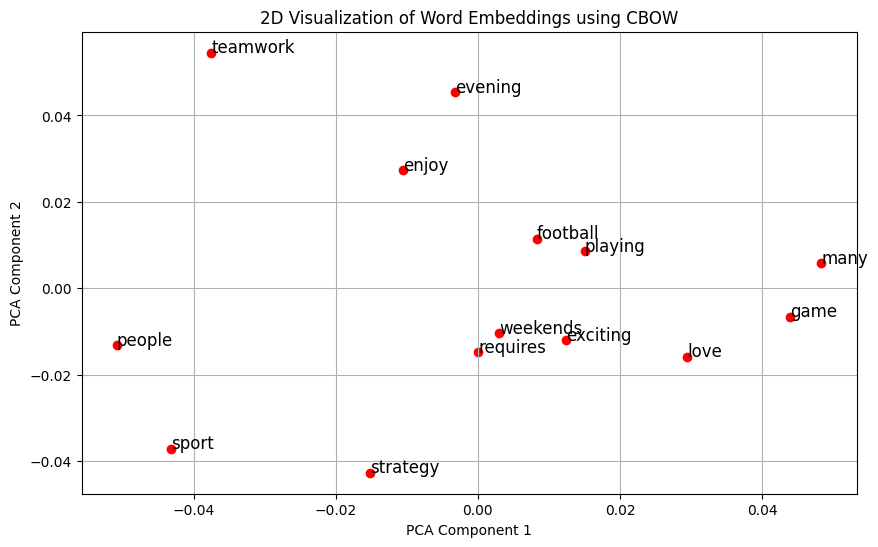

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract word vectors
word_vectors = np.array([cbow_model.wv[word] for word in cbow_model.wv.index_to_key])
words = list(cbow_model.wv.index_to_key)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='red')

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title("2D Visualization of Word Embeddings using CBOW")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


# Applying the same technique on the larger data set

In [8]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=c5b56700b1b66254856db4b82d78edb1988bda79a8dda1bb66796a6f1e2bcff7
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


In [15]:
import wikipediaapi
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import gensim
from gensim.models import Word2Vec
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='MyProjectName/1.0 (MyProjectURL; MyEmail@example.com)'
)

# Define topics (choose more for a larger dataset)
topics = ["Machine Learning", "Artificial Intelligence", "Deep Learning", "Neural Networks",
          "Natural Language Processing", "Big Data", "Computer Vision", "Data Science"]

# Fetch full text for each topic
wiki_texts = []
for topic in topics:
    page = wiki.page(topic)
    if page.exists():
        wiki_texts.append(page.text)  # Get full article text

# Combine all articles into one large text
wiki_text = " ".join(wiki_texts)

# Print sample text
print("Sample Wikipedia Text (First 500 characters):\n", large_wiki_text)


Sample Wikipedia Text (First 500 characters):
 Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning. 
From a theoretical vi

In [23]:
# Tokenize sentences
sentences = nltk.sent_tokenize(wiki_text)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Remove stopwords and punctuations
stop_words = set(stopwords.words("english"))
tokenized_sentences = [[word for word in sentence if word not in stop_words and word not in string.punctuation]
                       for sentence in tokenized_sentences]

# Print sample tokenized data
print("Tokenized Sentences:\n", tokenized_sentences)


Tokenized Sentences:
 [['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'study', 'statistical', 'algorithms', 'learn', 'data', 'generalize', 'unseen', 'data', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions'], ['within', 'subdiscipline', 'machine', 'learning', 'advances', 'field', 'deep', 'learning', 'allowed', 'neural', 'networks', 'class', 'statistical', 'algorithms', 'surpass', 'many', 'previous', 'machine', 'learning', 'approaches', 'performance'], ['ml', 'finds', 'application', 'many', 'fields', 'including', 'natural', 'language', 'processing', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture', 'medicine'], ['application', 'ml', 'business', 'problems', 'known', 'predictive', 'analytics'], ['statistics', 'mathematical', 'optimization', 'mathematical', 'programming', 'methods', 'comprise', 'foundations', 'machine', 'learning'], ['data', 'mining', 'related', 'field', 'study', 'f

In [24]:
# Train Word2Vec Model using CBOW
cbow_model_wiki = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, sg=0)

# Save the trained model
cbow_model_wiki.save("cbow_wikipedia.model")


In [26]:
# Find similar words to "learning"
similar_words = cbow_model_wiki.wv.most_similar('ai', topn=5)

print("Words similar to 'learning':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Words similar to 'learning':
``: 0.9995
data: 0.9995
images: 0.9995
systems: 0.9994
may: 0.9994
